## Exploratory data analysis
### Load the data

In [1]:
import pandas as pd

fname = "Dataset/hour.csv"
df = pd.read_csv(fname, encoding='utf-8-sig')

In [2]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Columns description
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Check for null values

In [4]:
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [5]:
# Drop dates and indexes from the dataset
df.drop(["dteday", "instant"], axis=1,inplace=True)

### Data visualization

According to the amount of data, we can use matplotlib to visualize the data. Otherwise, we would use plotly.

In [6]:
# vis methods
import matplotlib.pyplot as plt
def ShowPlot(x, title="", xlabel="", ylabel=""):
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.plot(x)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def ScatterPlot(x, y, title="", xlabel="", ylabel="", colour_data=None, point_size=None):
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.scatter(x, y, c=colour_data, s=point_size)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def correlation_matrix(df):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)

    correlations = df.corr()
    cax = ax.imshow(correlations, cmap='jet')
    
    plt.title('Correlation plot')
    labels=correlations.columns
    ticks = range(len(correlations.columns))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True)
    
    ax.set_xticklabels(labels,rotation='vertical')
    ax.set_yticklabels(labels)
    
    fig.colorbar(cax)
    plt.show()

### Data correlation 

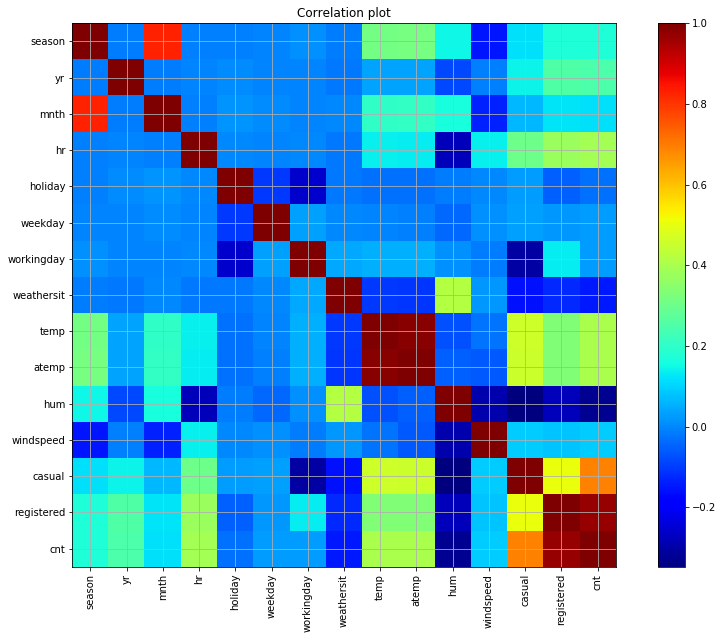

In [7]:
correlation_matrix(df)

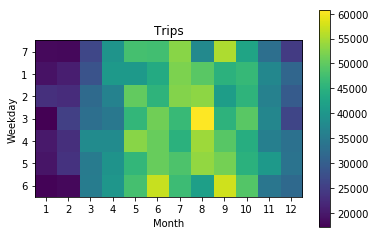

In [8]:
import numpy as np
df_vis = df.pivot_table(values='cnt', index='weekday', columns='mnth',aggfunc=np.sum);
plt.figure();
plt.title('Trips');
plt.imshow(df_vis,interpolation='none')
y_labels = df.weekday.unique()+1 
y_ticks = range(len(y_labels))
plt.yticks(range(7), y_labels);
plt.xticks(range(12), df_vis.columns);
plt.ylabel("Weekday")
plt.xlabel("Month")
plt.colorbar();
plt.show()

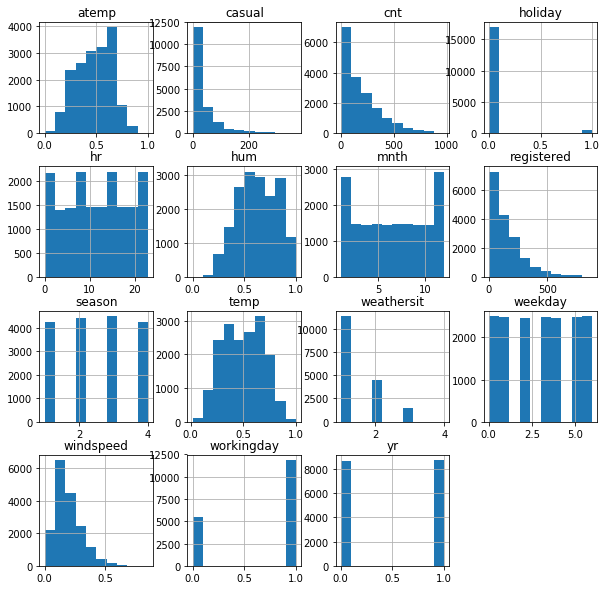

In [9]:
df.hist(figsize=(10,10))
plt.show()

In [10]:
print("Number rents of non-registered users", df.casual.sum())
print("Number rents of registered users", df.registered.sum())

Number rents of non-registered users 620017
Number rents of registered users 2672662


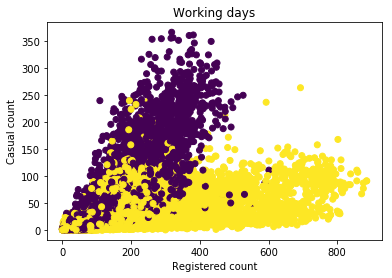

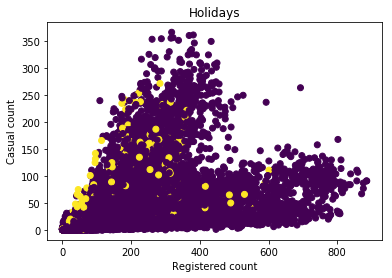

In [11]:
ScatterPlot(df.registered, df.casual, "Working days", "Registered count", "Casual count", colour_data=df.workingday)
ScatterPlot(df.registered, df.casual, "Holidays", "Registered count", "Casual count", colour_data=df.holiday)

These graphs shows us that casual users rent bikes more often on holidays and weekends. The number of registered users slightly decreaces on non-working days and more significantly on holidays. 

Is the "cnt" parameter autocorrelated?

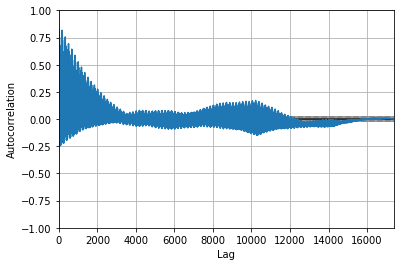

In [12]:
# Autocorrelation
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.cnt)
plt.show()

There are more than one values not closed to 0, the data is not random. 

### Trend and seasonality

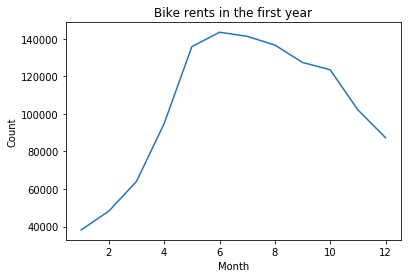

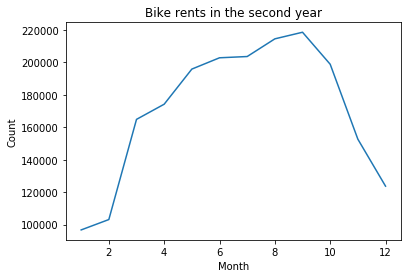

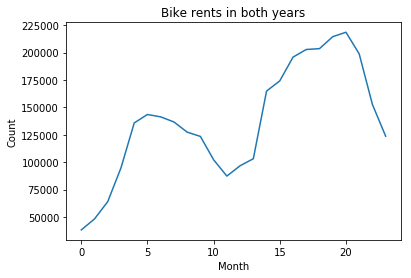

In [13]:
df_mnth_cnt = df.groupby(['mnth', 'yr'])['cnt'].sum().unstack()

ShowPlot(df_mnth_cnt[0], "Bike rents in the first year", "Month", "Count")
ShowPlot(df_mnth_cnt[1], "Bike rents in the second year", "Month", "Count")
ShowPlot(df_mnth_cnt[0].append(df_mnth_cnt[1]).reset_index(drop=True), "Bike rents in both years", "Month", "Count")

As we can see, the dataset has a trend and a seasonality. It is not stationary. 

### Difference between two years

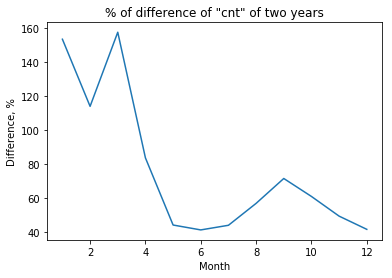

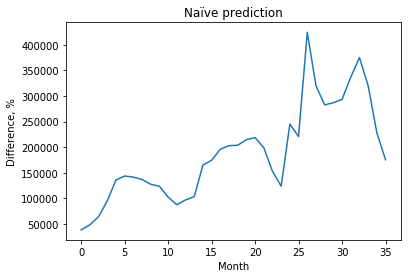

In [14]:
diff = df_mnth_cnt.pct_change(axis=1).mul(100)[1]
ShowPlot(diff, '% of difference of "cnt" of two years', 'Month', 'Difference, %')

# If the difference were the same in the next year, we would use naive prediction  
predicted = df_mnth_cnt[1] + df_mnth_cnt[1]*diff/100
ShowPlot(df_mnth_cnt[0].append(df_mnth_cnt[1]).append(predicted).reset_index(drop=True), 
         "Naïve prediction" , 'Month', 'Difference, %')

### t-SNE art

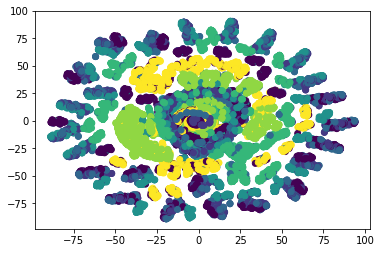

In [56]:
ScatterPlot(tsne[:,0], tsne[:,1], colour_data=df.weekday[:tsne.shape[0]])